In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pynq import Xlnk, Overlay

In [2]:
filter_design = Overlay('grey_filter.bit')

In [3]:
dma = filter_design.axi_dma_0
grey_filter = filter_design.grey_filter

### Max Size of Image is 2000x2000

In [4]:
image_path = "test.bmp"
original_image = Image.open(image_path)

### Display the Original Image
Also need the size to tell the hardware how large the photo will be

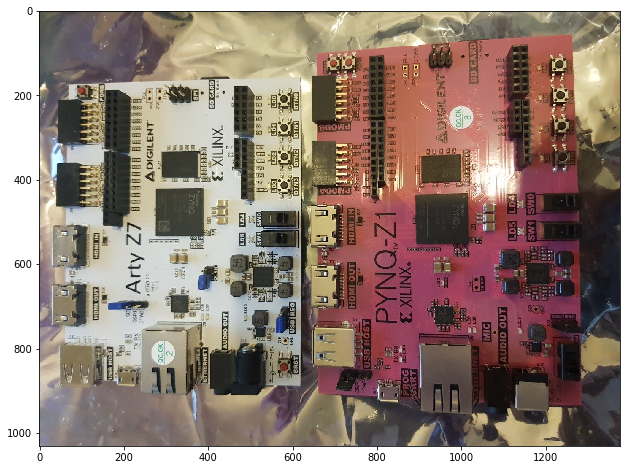

In [6]:
canvas = plt.gcf()
size = canvas.get_size_inches()
canvas.set_size_inches(size*2)

width, height = original_image.size
_ = plt.imshow(original_image)

In [7]:
xlnk = Xlnk()
in_buffer = xlnk.cma_array(shape=(height, width, 3), 
                           dtype=np.uint8, cacheable=1)
out_buffer = xlnk.cma_array(shape=(height, width, 3), 
                            dtype=np.uint8, cacheable=1)

## Sending the information to the PL

In [8]:
in_buffer[:] = np.array(original_image)

Set Up the Hight and Width

In [9]:
grey_filter.write(0x10, height) # Rows (hight)
grey_filter.write(0x18, width) # Columns (width)

In [ ]:
dma.sendchannel.transfer(in_buffer)
dma.recvchannel.transfer(out_buffer)
dma.sendchannel.wait()
dma.recvchannel.wait()

^^ Keeps stalling

In [ ]:
grey_image = Image.fromarray(out_buffer)

In [ ]:
_ = plt.imshow(grey_image)

In [ ]:
xlnk.xlnk_reset()